Someone said that searching the internet for pieces of code, assembling them together originally is an art, also known as software engineering. It is what I did here, with the aim of playing around with exciting mathematical entities, i.e. fractals.

In [0]:
import numpy
import matplotlib.pylab as plt

    The Mandelbrot set is a mathematical set of points whose boundary is a distinctive and easily recognizable two-dimensional fractal shape. The set is closely related to Julia sets (which include similarly complex shapes) and is named after the mathematician Benoit Mandelbrot, who studied and popularized it.

    Mandelbrot set images are made by sampling complex numbers and determining for each whether the result tends towards infinity when a particular mathematical operation is iterated on it. Treating the real and imaginary parts of each number as image coordinates, pixels are colored according to how rapidly the sequence diverges, if at all.

    More precisely, the Mandelbrot set is the set of values of c in the complex plane for which the orbit of 0 under iteration of the complex quadratic polynomial z^n+1=z^2n+c remains bounded.

In [2]:
m = 600 # Height of plot
n = 600 # Width of plot
values_real = numpy.linspace(-2.3, 1, n).reshape((1,n))
values_imag = numpy.linspace(-1.4, 1.4, m).reshape((m,1))
initial_values = values_real + values_imag*1j
initial_values.shape

(600, 600)

Let's now apply the function z_new=z*z+c to this grid. Then for each round we want to know which values are about to diverge. Because I don't have the patience to iterate an infinite amount of round, we just test all values if they are bigger than a certain threshold. Conveniently enough wikipedia argues that we only need to test if the norm of the value is above 2. For an imaginary number z=(x+iy) the norm is sqrt(x*x+y*y) = sqrt(z*conj(z)). For each iteration we log which numbers are divergent in the iterations matrix. We can then print this as a heatmap using matplotlib's imshow function:

In [6]:
values = initial_values
max_iterations = 30
iterations = numpy.ones(initial_values.shape) * max_iterations
for i in range(max_iterations) :
    values = values**2 + initial_values
    divergent = values * numpy.conj(values) > 4
    divergent = divergent & (iterations == max_iterations) # Test that we haven't already found this number
    iterations[divergent] = i

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in square
  """


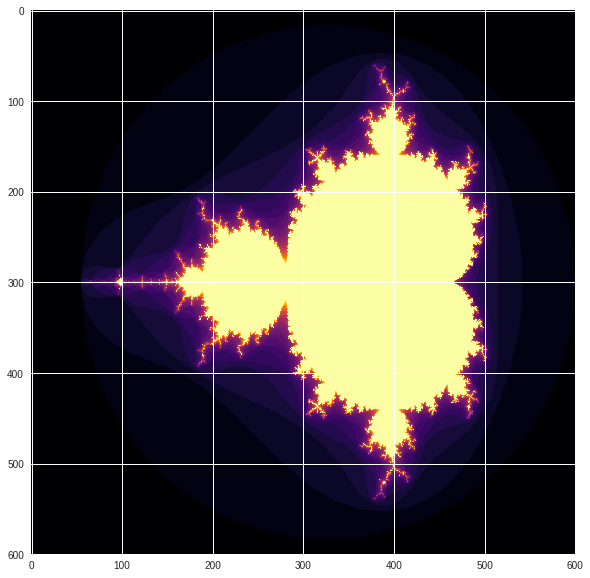

In [7]:
plt.rcParams['figure.figsize'] = 10, 10
plt.imshow(iterations,cmap='inferno')

In [0]:
def mandelbrot(width, height, x_lim = (-2.3, 1), y_lim = (-1.4, 1.4), max_iterations = 30) :
    m = height # Height of plot
    n = width # Width of plot
    values_real = numpy.linspace(x_lim[0], x_lim[1], n).reshape((1,n))
    values_imag = numpy.linspace(y_lim[0], y_lim[1], m).reshape((m,1))
    initial_values = values_real + values_imag*1j
    initial_values
    values = initial_values
    iterations = numpy.ones(initial_values.shape) * max_iterations
    for i in range(max_iterations) :
        values = values**2 + initial_values
        divergent = values * numpy.conj(values) > 4
        divergent = divergent & (iterations == max_iterations) # Test that we haven't already found this number
        iterations[divergent] = i
    return iterations

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in square
  # This is added back by InteractiveShellApp.init_path()


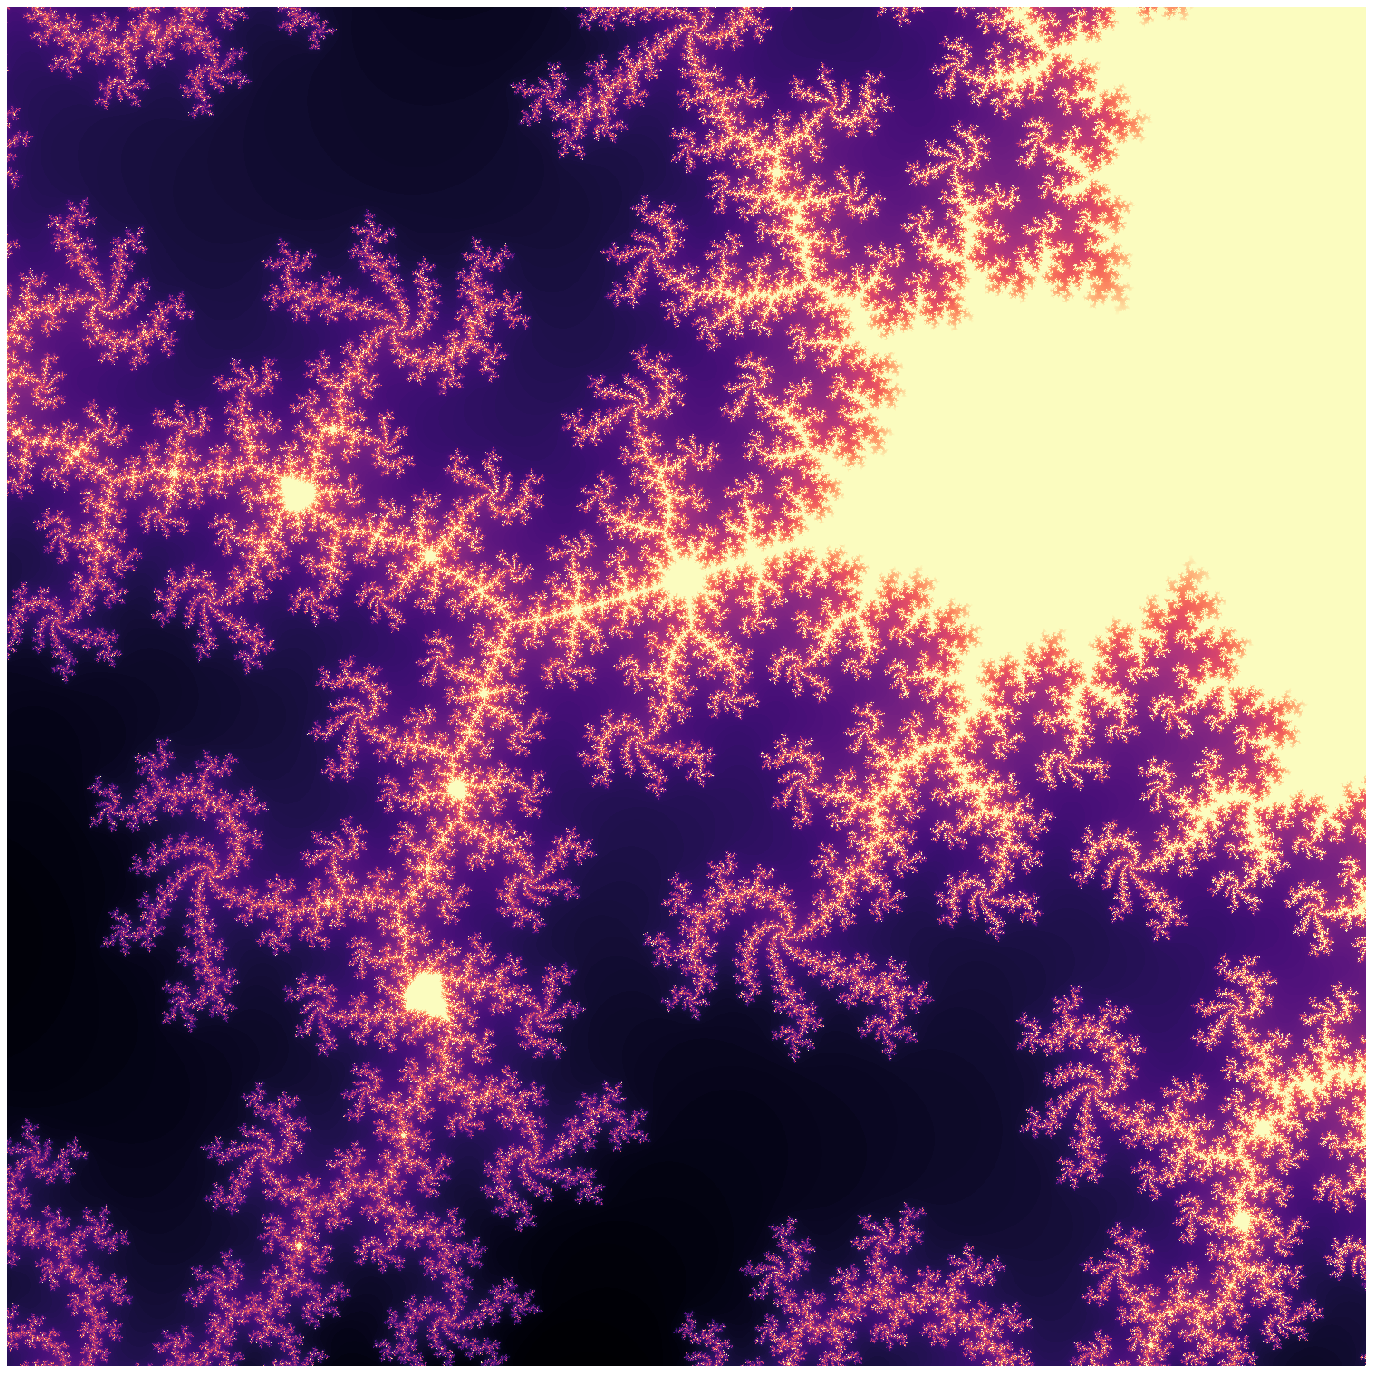

In [30]:
mandelbrot_data = mandelbrot(1500, 1500, (-0.56, -0.55), (-0.56,-0.55), 200)

plt.figure(figsize = (25,25))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(mandelbrot_data,cmap='magma')